# New Section

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('/content/animal_data (1).csv')

In [ ]:
data

,Animal,Weight (kg),Top Speed (km/h),Lifespan (years),Social Behavior,Diet,Habitat
0,Gorilla,180,50,40,Social,Herbivore,Forests
1,Grizzly Bear,600,56,25,Solitary,Omnivore,Forests
2,Hippo,2500,30,50,Social,Herbivore,Water
3,Kangaroo,70,70,16,Social,Herbivore,Grasslands
4,Lion,200,80,14,Social,Carnivore,Grasslands
5,Orangutan,50,35,46,Solitary,Omnivore,Forests
6,Panther,60,60,8,Solitary,Carnivore,Forests
7,Polar Bear,600,40,30,Solitary,Carnivore,Arctic
8,Raccoons,25,15,3,Social,Omnivore,Forests
9,Sheep,150,40,12,Social,Herbivore,Grasslands


In [ ]:
data.shape

(30, 7)

In [ ]:
data['Social Behavior'] = data['Social Behavior'].astype('category').cat.codes
data['Diet'] = data['Diet'].astype('category').cat.codes
data['Habitat'] = data['Habitat'].astype('category').cat.codes
data

,Animal,Weight (kg),Top Speed (km/h),Lifespan (years),Social Behavior,Diet,Habitat,Cluster
0,Gorilla,180,50,40,1,1,2,1
1,Grizzly Bear,600,56,25,2,2,2,1
2,Hippo,2500,30,50,1,1,5,2
3,Kangaroo,70,70,16,1,1,3,1
4,Lion,200,80,14,1,0,3,0
5,Orangutan,50,35,46,2,2,2,1
6,Panther,60,60,8,2,0,2,0
7,Polar Bear,600,40,30,2,0,0,0
8,Raccoons,25,15,3,1,2,2,1
9,Sheep,150,40,12,1,1,3,1


In [ ]:
df = data.drop(columns=['Animal'])
df

,Weight (kg),Top Speed (km/h),Lifespan (years),Social Behavior,Diet,Habitat
0,180,50,40,1,1,2
1,600,56,25,2,2,2
2,2500,30,50,1,1,5
3,70,70,16,1,1,3
4,200,80,14,1,0,3
5,50,35,46,2,2,2
6,60,60,8,2,0,2
7,600,40,30,2,0,0
8,25,15,3,1,2,2
9,150,40,12,1,1,3


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df


,Weight (kg),Top Speed (km/h),Lifespan (years),Social Behavior,Diet,Habitat
0,-0.466711,-0.032877,0.665538,-0.417585,0.306186,-0.685994
1,-0.056945,0.213702,-0.175732,1.372065,1.837117,-0.685994
2,1.796762,-0.854807,1.226385,-0.417585,0.306186,1.886484
3,-0.574031,0.789053,-0.680494,-0.417585,0.306186,0.171499
4,-0.447199,1.200018,-0.792663,-0.417585,-1.224745,0.171499
5,-0.593544,-0.649325,1.002046,1.372065,1.837117,-0.685994
6,-0.583788,0.378088,-1.129171,1.372065,-1.224745,-0.685994
7,-0.056945,-0.443842,0.104691,1.372065,-1.224745,-2.400980
8,-0.617935,-1.471255,-1.409595,-0.417585,1.837117,-0.685994
9,-0.495980,-0.443842,-0.904833,-0.417585,0.306186,0.171499


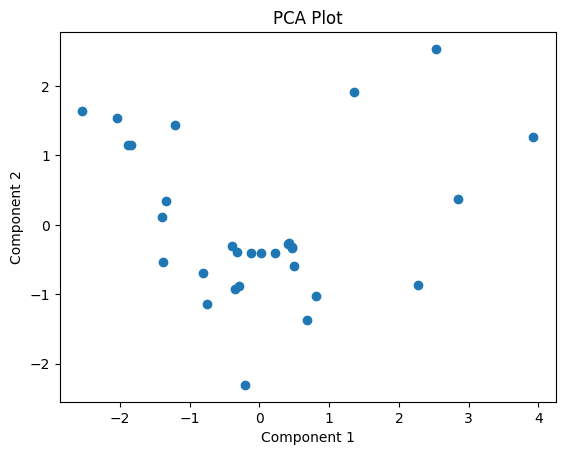

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

transformed_data = pca.fit_transform(scaled_df)

transformed_df = pd.DataFrame(transformed_data, columns=['Component 1', 'Component 2'])

plt.scatter(transformed_df['Component 1'], transformed_df['Component 2'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Plot')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

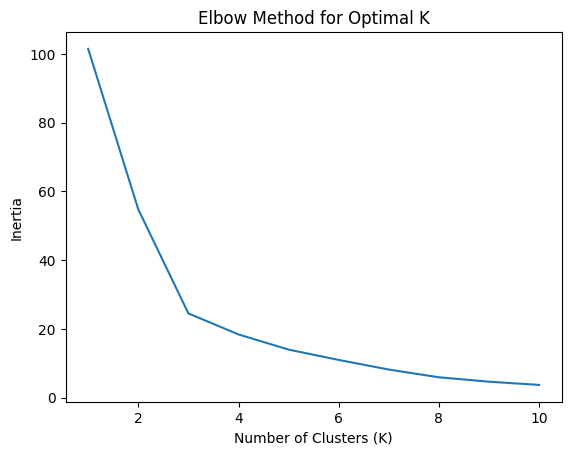

In [ ]:
def kmeans_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    return kmeans.inertia_
max_clusters = 10
inertia = []

for k in range(1,max_clusters+1):
    inertia.append(kmeans_clustering(transformed_df,k))




plt.plot(range(1, max_clusters+1), inertia)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


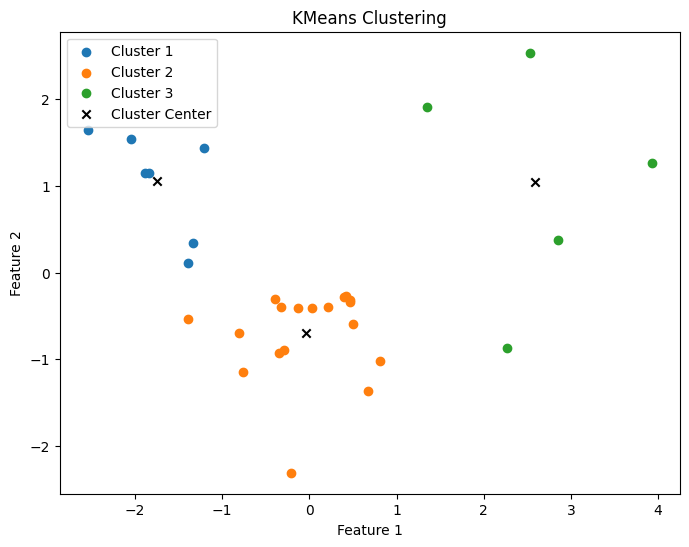

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(transformed_df)

plt.figure(figsize=(8, 6))

cluster_centers = kmeans.cluster_centers_

for i in range(optimal_k):
    cluster_points = transformed_df[data['Cluster'] == i]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i+1}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', label='Cluster Center')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
data

,Animal,Weight (kg),Top Speed (km/h),Lifespan (years),Social Behavior,Diet,Habitat,Cluster
0,Gorilla,180,50,40,1,1,2,1
1,Grizzly Bear,600,56,25,2,2,2,1
2,Hippo,2500,30,50,1,1,5,2
3,Kangaroo,70,70,16,1,1,3,1
4,Lion,200,80,14,1,0,3,0
5,Orangutan,50,35,46,2,2,2,1
6,Panther,60,60,8,2,0,2,0
7,Polar Bear,600,40,30,2,0,0,0
8,Raccoons,25,15,3,1,2,2,1
9,Sheep,150,40,12,1,1,3,1


In [ ]:
unique_clusters = data['Cluster'].unique()
for cluster in (unique_clusters):
    animals = data.loc[data['Cluster'] == cluster, 'Animal'].values
    print(f"Animals in Cluster {cluster+1}: {animals}")

Animals in Cluster 2: ['Gorilla' 'Grizzly Bear' 'Kangaroo' 'Orangutan' 'Raccoons' 'Sheep'
 'Water Buffalo' 'Zebra' 'African Buffalo' 'Angus cattle' 'Beaver' 'Bison'
 'Camel' 'Chimpanzee' 'Fox' 'Ghazel' 'Giraffe' 'Goat']
Animals in Cluster 3: ['Hippo' 'White rhinoceros' 'Alligator' 'Crocodile' 'Elephant']
Animals in Cluster 1: ['Lion' 'Panther' 'Polar Bear' 'Tiger' 'Wild cat' 'Wolf' 'Cheetah']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')